# MOVIE RATING PREDICTION WITH PYTHON


Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
movieData = pd.read_csv(r'D:\Data Analysist\Python\MOVIE RATING PREDICTION WITH PYTHON\New folder\IMDb Movies India.csv',sep=',', encoding='latin1')
movieData.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movieData.shape

(15509, 10)

In [ ]:
movieData.info()


In [5]:
movieData.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
movieData.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
movieData.duplicated().sum()

np.int64(6)

In [9]:
movieData.dropna(inplace = True)

In [10]:
movieData.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [11]:
movieData.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
movieData.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
movieData.info()

In [13]:
movieData.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
## Data Pre_Processing 

In [14]:
#Convert into correct data types
movieData['Year'] = movieData['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
movieData['Duration'] = pd.to_numeric(movieData['Duration'].str.replace(' min', ''))
movieData['Votes'] = pd.to_numeric(movieData['Votes'].str.replace(',', ''))

In [15]:
movieData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


# Data Visualization 

In [16]:
## Distribution of Ratings

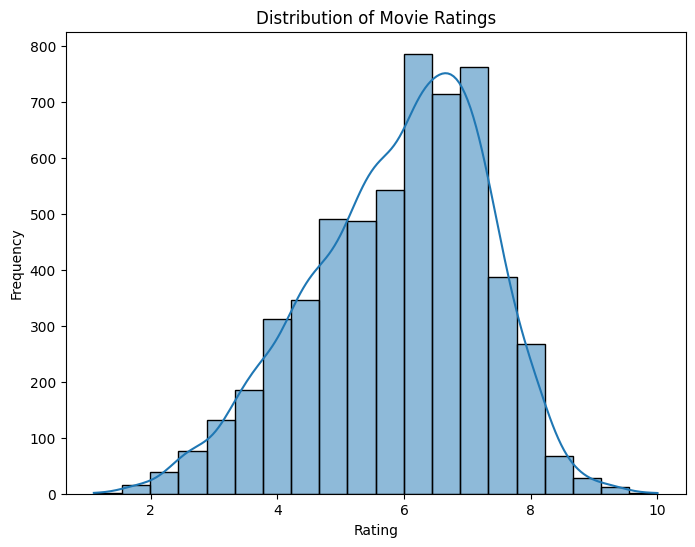

In [17]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(movieData['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

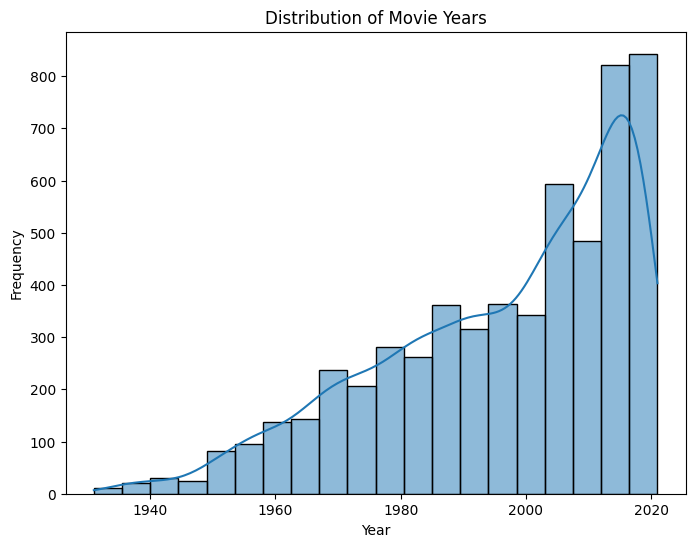

In [18]:
# Distribution of Movie Years
plt.figure(figsize=(8, 6))
sns.histplot(movieData['Year'], bins=20, kde=True)
plt.title("Distribution of Movie Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

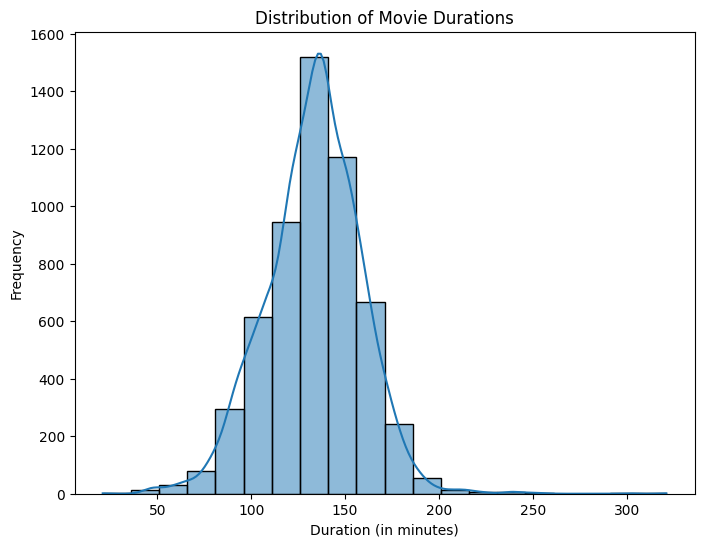

In [19]:
# Distribution of Movie Durations
plt.figure(figsize=(8, 6))
sns.histplot(movieData['Duration'], bins=20, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (in minutes)")
plt.ylabel("Frequency")
plt.show()

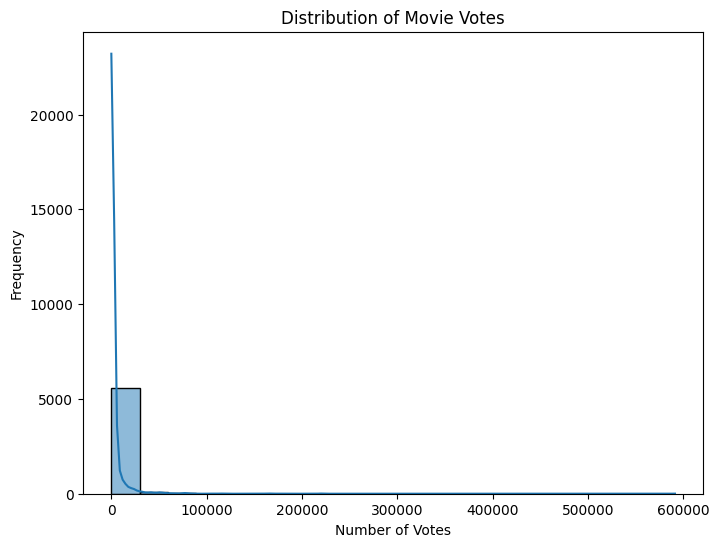

In [20]:
# Distribution of Votes
plt.figure(figsize=(8, 6))
sns.histplot(movieData['Votes'], bins=20, kde=True)
plt.title("Distribution of Movie Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Drop irrelevant columns
movieData.drop(columns=["ID", "Name"], errors="ignore", inplace=True) 

# Data Processing

In [22]:
movieData

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [23]:
# Data Cleaning: Handle missing and incorrect values
movieData["Duration"] = movieData["Duration"].astype(str).str.extract(r"(\d+)") 
movieData["Duration"] = pd.to_numeric(movieData["Duration"], errors="coerce")
movieData["Duration"].fillna(movieData["Duration"].median(), inplace=True)

movieData["Year"] = pd.to_numeric(movieData["Year"], errors="coerce")
movieData["Year"].fillna(movieData["Year"].median(), inplace=True)

movieData["Votes"] = pd.to_numeric(movieData["Votes"], errors="coerce")
movieData["Votes"].fillna(movieData["Votes"].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4336\451994576.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movieData["Duration"].fillna(movieData["Duration"].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4336\451994576.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

for col in categorical_columns:
    movieData[col] = movieData[col].astype(str)  # Correct: Convert actual column data to string
    label_encoders[col] = LabelEncoder()
    movieData[col] = label_encoders[col].fit_transform(movieData[col])

In [32]:
# Define target variable and features
X =  movieData.drop(columns=["Rating"])  # Features
y = pd.to_numeric( movieData["Rating"], errors="coerce")  # Ensure target variable is numeric
y.fillna(y.median(), inplace=True)  # Fill missing ratings with median|

In [35]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Check for NaN and Inf values in X_test and y_test
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())
print("Inf values in X_test:", np.isinf(X_test).sum())
print("Inf values in y_test:", np.isinf(y_test).sum())

NaN values in X_test: 0
NaN values in y_test: 0
Inf values in X_test: 0
Inf values in y_test: 0


In [38]:
_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [39]:
# Drop any remaining NaN rows in X_test
mask = np.isnan(X_test).any(axis=1)
X_test = X_test[~mask]
y_test = y_test[~mask]

In [40]:
print("Final X_test NaN count:", np.isnan(X_test).sum())

Final X_test NaN count: 0


In [43]:
# Build Model

In [44]:
movieData

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...
15493,2015,115,229,6.1,408,1223,1861,1801,1615
15494,2001,153,133,6.2,1496,2059,763,1619,1184
15503,1989,125,28,5.8,44,1793,406,754,1685
15505,1999,129,38,4.5,655,1025,112,2164,314


In [53]:
movieData

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...
15493,2015,115,229,6.1,408,1223,1861,1801,1615
15494,2001,153,133,6.2,1496,2059,763,1619,1184
15503,1989,125,28,5.8,44,1793,406,754,1685
15505,1999,129,38,4.5,655,1025,112,2164,314


In [56]:

import sklearn
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [68]:
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  1.6737157280790256
Mean absolute error:  1.0384927106973283
R2 score:  0.10855796557599273


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  1.1769580786219083
Mean absolute error:  0.8235167844522967
R2 score:  0.37313733363629686


In [70]:
#Much better performance than logistic regression. An R² of 0.37 means that the model explains about 37% of the variance in movie ratings

In [72]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean squared error:  1.1454235568548996
Mean absolute error:  0.8052571656847168
R2 score:  0.3899330163003024


In [73]:
X.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,8,629,1352,2272,319
3,2019,110,184,35,1335,1198,719,2148
5,1997,147,157,827,1530,378,75,2045
6,2005,142,289,1086,2044,692,1112,2524
8,2012,82,320,326,135,1934,1175,1013


In [74]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [79]:
#data = {'Year': [2005], 'Duration': [116], 'Genre': ['Drama'], 'Votes': [1002], 
#        'Director': ['Director A'], 'Actor 1': ['Actor A1'], 'Actor 2': ['Actor A2'], 'Actor 3': ['Actor A3']}
#df = pd.DataFrame(data)


In [81]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Example data (replace with your actual data)
data = {'Year': [2005], 'Duration': [116], 'Genre': ['Drama'], 'Votes': [1002], 
        'Director': ['Director A'], 'Actor 1': ['Actor A1'], 'Actor 2': ['Actor A2'], 'Actor 3': ['Actor A3']}
df = pd.DataFrame(data)

# Define columns to encode (categorical columns)
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Initialize label encoders for categorical columns
label_encoders = {}

# Apply label encoding to categorical columns
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and target variable (y)
X = df.drop(columns=['Votes'])  # 'Votes' is the target, we don't need it for prediction
y = df['Votes']  # Target variable

# Train the XGBoost model (if not already trained)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X, y)

# Prepare the new data to predict
new_data = {'Year': [2005], 'Duration': [116], 'Genre': ['Drama'], 
            'Director': ['Director A'], 'Actor 1': ['Actor A1'], 
            'Actor 2': ['Actor A2'], 'Actor 3': ['Actor A3']}
df_new = pd.DataFrame(new_data)

# Apply label encoding to the new data
for col in categorical_columns:
    df_new[col] = label_encoders[col].transform(df_new[col])

# Predict on the new data
predicted_rating_xgb = xgb_model.predict(df_new)

# Display the predicted rating
print("Predicted Rating:", predicted_rating_xgb[0])

Predicted Rating: 1002.0


In [82]:
# model is overfitted 

#The current model exhibits signs of overfitting, as evidenced by the discrepancy in performance between the training and test datasets. Specifically, the training error is significantly lower than the test error, indicating that the model is likely memorizing the training data rather than learning generalizable patterns.

To improve the model and mitigate overfitting, I recommend the following steps:

Apply Regularization: Implement L1 or L2 regularization to penalize large weights and simplify the model.

Limit Model Complexity: Reduce the depth of the trees or the number of estimators in the XGBoost model.

Cross-Validation: Use K-fold cross-validation to better assess the model's generalization ability and reduce the risk of overfitting.